In [29]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


### Í¥ëÍ≥†ÏãúÏÑ§Î¨º Ïú†ÌòïÎ≥Ñ Î©¥Ï†Å Í∏∞Ï§Ä (Ï†ïÏÑ±Í∏∞Ìöç, Ïó∞ÏàòÍµ¨Ï≤≠)

| Í¥ëÍ≥†ÏãúÏÑ§Î¨ºÎ™Ö               | Í¥ëÍ≥† Ïú†Ìòï         | ÌèâÍ∑† ÌÅ¨Í∏∞ (mm)        | Î©¥Ï†Å (mÏ†úÍ≥±) | Ï∂úÏ≤ò     |
|----------------------------|-------------------|------------------------|-----------|----------|
| DID                        | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê       | 1,920 √ó 1,080          | 2.07      | Ï†ïÏÑ±Í∏∞Ìöç |
| Í∞ÄÎ°úÍ∏∞                     | Î∞∞ÎÑàÌòï Í¥ëÍ≥†        | 600 √ó 1,800            | 1.08      | Ïó∞ÏàòÍµ¨Ï≤≠ |
| Í∏∞Îë•ÏÇ¨Ïù¥Î≤ΩÎ©¥               | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†     | 2,000 √ó 3,000          | 6.00      | Ï†ïÏÑ±Í∏∞Ìöç |
| ÎåÄÌòï Î≤ΩÎ©¥                  | ÎåÄÌòï Î≤ΩÎ©¥ Í¥ëÍ≥†     | 5,000 √ó 10,000         | 50.00     | Ï†ïÏÑ±Í∏∞Ìöç |
| Î≤ΩÎ©¥                       | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†     | 2,000 √ó 3,000          | 6.00      | Ï†ïÏÑ±Í∏∞Ìöç |
| Î≤ΩÎ©¥(DID)                  | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê       | 1,920 √ó 1,080          | 2.07      | Ï†ïÏÑ±Í∏∞Ìöç |
| Î≤ΩÎ©¥/DID                   | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê       | 1,920 √ó 1,080          | 2.07      | Ï†ïÏÑ±Í∏∞Ìöç |
| Î≤ΩÎ©¥/DID/Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥        | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê       | 1,920 √ó 1,080          | 2.07      | Ï†ïÏÑ±Í∏∞Ìöç |
| Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥                 | Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥ Í¥ëÍ≥†    | 2,000 √ó 1,300          | 2.60      | Ï†ïÏÑ±Í∏∞Ìöç |
| Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥(DID)           | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê       | 1,920 √ó 1,080          | 2.07      | Ï†ïÏÑ±Í∏∞Ìöç |
| ÏäπÍ∞ïÏû• ÏïàÏ†ÑÎ¨∏              | Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥ Í¥ëÍ≥†    | 2,000 √ó 1,300          | 2.60      | Ï†ïÏÑ±Í∏∞Ìöç |
| ÏäπÍ∞ïÏû• ÏïàÏ†ÑÎ¨∏/Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥   | Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥ Í¥ëÍ≥†    | 2,000 √ó 1,300          | 2.60      | Ï†ïÏÑ±Í∏∞Ìöç |
| ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏               | Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥ Í¥ëÍ≥†    | 2,000 √ó 1,300          | 2.60      | Ï†ïÏÑ±Í∏∞Ìöç |
| Ïú†Î¶¨Î≤ΩÎ©¥                   | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†     | 2,000 √ó 3,000          | 6.00      | Ï†ïÏÑ±Í∏∞Ìöç |
| Ï†ÑÎèôÏ∞®ÎÇ¥Î∂Ä                 | Ï∞®Îüâ ÎÇ¥Î∂Ä Í¥ëÍ≥†     | 400 √ó 900              | 0.36      | Ï†ïÏÑ±Í∏∞Ìöç |
| Ï†ïÎ•òÏÜå                     | ÏßÄÏÉÅ Í¥ëÍ≥†          | 1,200 √ó 1,800          | 2.16      | Ïó∞ÏàòÍµ¨Ï≤≠ |
| Ï°∞Î™ÖÎ∞ïÏä§                   | Ï°∞Î™ÖÌòï Í¥ëÍ≥†        | 1,200 √ó 1,800          | 2.16      | Ï†ïÏÑ±Í∏∞Ìöç |
| Ï°∞Î™ÖÎ∞ïÏä§/DID               | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê       | 1,920 √ó 1,080          | 2.07      | Ï†ïÏÑ±Í∏∞Ìöç |
| ÏßÄÌïòÎèÑ                     | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†     | 2,000 √ó 3,000          | 6.00      | Ï†ïÏÑ±Í∏∞Ìöç |
| Ï≤≠ÏÇ¨ÎÇ¥                     | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†     | 2,000 √ó 3,000          | 6.00      | Ï†ïÏÑ±Í∏∞Ìöç |



### Í¥ëÍ≥†ÏãúÏÑ§Î¨ºÎ™ÖÎ≥Ñ Í¥ëÍ≥†Ïú†Ìòï Î∞è Î©¥Ï†Å Ï∂îÎ°† Í∏∞Ï§Ä 

| Í¥ëÍ≥†ÏãúÏÑ§Î¨ºÎ™Ö                     | Îß§ÌïëÎêú Í¥ëÍ≥† Ïú†Ìòï     | Ï∂îÎ°† Í∑ºÍ±∞ ÌÇ§ÏõåÎìú                     | Ï∂îÎ°† Î©¥Ï†Å (m¬≤) |
|----------------------------------|------------------------|---------------------------------------|----------------|
| Í≥µÍ∞ÑÌôúÏö© ÌîÑÎ°úÎ™®ÏÖò               | ÎåÄÌòï Î≤ΩÎ©¥ Í¥ëÍ≥†         | ÌîÑÎ°úÎ™®ÏÖò = ÎåÄÌòï Î≤ΩÎ©¥ ÌôúÏö©            | 50.00          |
| Í∏∞Îë•Ï°∞Î™Ö                         | Ï°∞Î™ÖÌòï Í¥ëÍ≥†            | Ï°∞Î™Ö, Í∏∞Îë• = Ï°∞Î™ÖÎ∞ïÏä§                | 2.16           |
| ÎîîÏßÄÌÑ∏Î≥¥Îìú                       | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê            | DID Í≥ÑÏó¥                              | 2.07           |
| ÎîîÏßÄÌÑ∏Ï¢ÖÌï©ÏïàÎÇ¥ÎèÑ_ÎîîÏßÄÌÑ∏          | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê            | DID Í≥ÑÏó¥                              | 2.07           |
| ÎîîÏßÄÌÑ∏Ï¢ÖÌï©ÏïàÎÇ¥ÎèÑ_Ïù∏ÏáÑÏãù          | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†         | ÏïàÎÇ¥ÎèÑ + Ïù∏ÏáÑ = Î≤ΩÎ©¥                 | 6.00           |
| ÎîîÏßÄÌÑ∏Ï¢ÖÌï©ÏïàÎÇ¥ÎèÑ_Ï°∞Î™Ö            | Ï°∞Î™ÖÌòï Í¥ëÍ≥†            | ÏïàÎÇ¥ÎèÑ + Ï°∞Î™Ö                         | 2.16           |
| ÎîîÏßÄÌÑ∏Ìè¨Ïä§ÌÑ∞                     | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê            | DID Í≥ÑÏó¥                              | 2.07           |
| Î©ÄÌã∞ÎπÑÏ†º                         | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê            | Î©ÄÌã∞ÎπÑÏ†Ñ = DID Í≥ÑÏó¥                  | 2.07           |
| Ïä§ÎßàÌä∏ Ï†ïÎ≥¥ ÏïàÎÇ¥ÏãúÏä§ÌÖú          | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê            | Ïä§ÎßàÌä∏ + Ï†ïÎ≥¥ + DID                  | 2.07           |
| ÏäπÍ∞ïÏû•Îß§Î¶ΩÌòï                     | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†         | Îß§Î¶ΩÌòï Î≤ΩÎ©¥                           | 6.00           |
| ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏ Í¥ëÍ≥†(ÎØºÏûê)_ÎÇúÍ∞ÑÌòï   | Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥ Í¥ëÍ≥†        | ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏                          | 2.60           |
| ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏ Í¥ëÍ≥†(ÎØºÏûê)_ÎèôÏòÅÏÉÅ   | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê            | ÎèôÏòÅÏÉÅ = DID Í≥ÑÏó¥                    | 2.07           |
| ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏ Í¥ëÍ≥†(ÎØºÏûê)_ÏùºÎ∞òÌòï   | Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥ Í¥ëÍ≥†        | ÏùºÎ∞òÌòï = Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥                  | 2.60           |
| ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏ Ï°∞Î™Ö(ÎØºÏûêÏ†úÏô∏)      | Ïä§ÌÅ¨Î¶∞ÎèÑÏñ¥ Í¥ëÍ≥†        | Ï°∞Î™Ö + ÏïàÏ†ÑÎ¨∏                        | 2.60           |
| ÏäπÍ∞ïÏû•ÏùåÏÑ±Í¥ëÍ≥†                   | ÎπÑÏãúÍ∞Å Îß§Ï≤¥ (Î©¥Ï†Å 0 Ï≤òÎ¶¨) | ÏùåÏÑ± Ï†ÑÏö©, Î©¥Ï†Å ÏóÜÏùå                | 0.00           |
| Ïó≠Íµ¨ÎÇ¥Ï°∞Î™ÖÍ¥ëÍ≥†                   | Ï°∞Î™ÖÌòï Í¥ëÍ≥†            | Ï°∞Î™Ö Í¥ëÍ≥†                             | 2.16           |
| Ïó≠Íµ¨ÎÇ¥Ìè¨Ïä§ÌÑ∞                     | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†         | Ìè¨Ïä§ÌÑ∞ = Î≤ΩÎ©¥                         | 6.00           |
| Ïó≠Íµ¨ÎÇ¥ÌñâÏÑ†ÏïàÎÇ¥Í≤åÏãúÍ∏∞             | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê            | ÏïàÎÇ¥ + ÎîîÏßÄÌÑ∏ Í∏∞Îä•                    | 2.07           |
| Ï†ú2Í∏∞ ÍµêÌÜµÏπ¥Îìú RFÎã®ÎßêÍ∏∞ Í¥ëÍ≥†     | ÎîîÏßÄÌÑ∏ Ìå®ÎÑê            | Îã®ÎßêÍ∏∞ = ÎîîÏßÄÌÑ∏ Í∏∞Í∏∞                 | 2.07           |
| ÏßÄÌïòÏ≤† Ï∂úÏûÖÍµ¨ ÏÉÅÎã®Î≤ΩÎ©¥           | Í≥†Ï†ï Î≤ΩÎ©¥ Í¥ëÍ≥†         | Î≤ΩÎ©¥ ÌÇ§ÏõåÎìú                           | 6.00           |


In [3]:
# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('ad_info.csv', encoding='euc-kr')

# Í¥ëÍ≥†ÏãúÏÑ§Î¨ºÎ™ÖÏóê Îî∞Îùº Î©¥Ï†Å Îß§Ìïë 
area_mapping = {
    'Í≥µÍ∞ÑÌôúÏö© ÌîÑÎ°úÎ™®ÏÖò': 50.00,
    'Í∏∞Îë•Ï°∞Î™Ö': 2.16,
    'ÎîîÏßÄÌÑ∏Î≥¥Îìú': 2.07,
    'ÎîîÏßÄÌÑ∏Ï¢ÖÌï©ÏïàÎÇ¥ÎèÑ_ÎîîÏßÄÌÑ∏': 2.07,
    'ÎîîÏßÄÌÑ∏Ï¢ÖÌï©ÏïàÎÇ¥ÎèÑ_Ïù∏ÏáÑÏãù': 6.00,
    'ÎîîÏßÄÌÑ∏Ï¢ÖÌï©ÏïàÎÇ¥ÎèÑ_Ï°∞Î™Ö': 2.16,
    'ÎîîÏßÄÌÑ∏Ìè¨Ïä§ÌÑ∞': 2.07,
    'Î©ÄÌã∞ÎπÑÏ†º': 2.07,
    'Ïä§ÎßàÌä∏ Ï†ïÎ≥¥ ÏïàÎÇ¥ÏãúÏä§ÌÖú': 2.07,
    'Ïó≠Íµ¨ÎÇ¥Ï°∞Î™ÖÍ¥ëÍ≥†': 2.16,
    'Ïó≠Íµ¨ÎÇ¥Ìè¨Ïä§ÌÑ∞': 6.00,
    'Ïó≠Íµ¨ÎÇ¥ÌñâÏÑ†ÏïàÎÇ¥Í≤åÏãúÍ∏∞': 2.07,
    'Ï†ú2Í∏∞ ÍµêÌÜµÏπ¥Îìú RFÎã®ÎßêÍ∏∞ Í¥ëÍ≥†': 2.07,
    'ÏßÄÌïòÏ≤† Ï∂úÏûÖÍµ¨ ÏÉÅÎã®Î≤ΩÎ©¥': 6.00,
}

area_mapping2 = {
    'ÏäπÍ∞ïÏû•Îß§Î¶ΩÌòï': 6.00,
    'ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏ Í¥ëÍ≥†(ÎØºÏûê)_ÎÇúÍ∞ÑÌòï': 2.60,
    'ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏ Í¥ëÍ≥†(ÎØºÏûê)_ÎèôÏòÅÏÉÅ': 2.07,
    'ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏ Í¥ëÍ≥†(ÎØºÏûê)_ÏùºÎ∞òÌòï': 2.60,
    'ÏäπÍ∞ïÏû•ÏïàÏ†ÑÎ¨∏ Ï°∞Î™Ö(ÎØºÏûêÏ†úÏô∏)': 2.60,
    'ÏäπÍ∞ïÏû•ÏùåÏÑ±Í¥ëÍ≥†': 0.00,
}
# Í¥ëÍ≥†ÏãúÏÑ§Î¨º Î©¥Ï†Å Ïª¨Îüº ÏÉùÏÑ±

df['Î©¥Ï†Å'] = df['Í¥ëÍ≥†ÏãúÏÑ§Î¨ºÎ™Ö'].map(area_mapping).fillna(0.00).round(2)
df['ÏäπÍ∞ïÏû•Î©¥Ï†Å'] = df['Í¥ëÍ≥†ÏãúÏÑ§Î¨ºÎ™Ö'].map(area_mapping2).fillna(0.00).round(2)

df.drop(columns=['Ìò∏ÏÑ†', 'Ïó∞Î≤à', 'Ïó≠Î≤àÌò∏', 'Í¥ëÍ≥†ÎåÄÌñâÏÇ¨', 'Îç∞Ïù¥ÌÑ∞Í∏∞Ï§ÄÏùºÏûê'], errors='ignore', inplace=True)

# Î©¥Ï†Å Ï∂îÍ∞ÄÎêú Í≤∞Í≥º Ï†ÄÏû•
df.to_csv('ad_facility_with_area.csv', index=False, encoding='euc-kr')


In [4]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('ad_facility_with_area.csv', encoding='euc-kr')

# ÏÇ¨Ïö©Î©¥Ï†Å Í≥ÑÏÇ∞
df['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†Å'] = df['Î©¥Ï†Å'] * df['Í¥ëÍ≥†ÏãúÏÑ§Î¨º ÏàòÎüâ']
df['ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†Å'] = df['ÏäπÍ∞ïÏû•Î©¥Ï†Å'] * df['Í¥ëÍ≥†ÏãúÏÑ§Î¨º ÏàòÎüâ']

# Î∂àÌïÑÏöîÌïú ÏπºÎüº ÏÇ≠Ï†ú
df.drop(columns=['Í¥ëÍ≥†ÏãúÏÑ§Î¨ºÎ™Ö', 'Í¥ëÍ≥†ÏãúÏÑ§Î¨º ÏàòÎüâ'], inplace=True)

# Ïó≠Î™Ö Í∏∞Ï§ÄÏúºÎ°ú ÏÇ¨Ïö©Î©¥Ï†Å Ìï©ÏÇ∞ (Î¶¨Ïä§Ìä∏Î°ú Îã§Ï§ë Ïª¨Îüº ÏßÄÏ†ï)
df_grouped = df.groupby('Ïó≠Î™Ö', as_index=False)[['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†Å', 'ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†Å']].sum()

# Ï†ÄÏû•
df_grouped.to_csv('ad_usage_area_by_station.csv', index=False, encoding='euc-kr')



In [5]:
# Í¥ëÍ≥† Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
ad_raw = pd.read_csv('ad_usage_area_by_station.csv', encoding='euc-kr')
ad_raw.columns = ad_raw.columns.str.strip()

# Ïó≠Î™Ö Í¥ÑÌò∏ Ï†úÍ±∞ ÎåÄÏÉÅ Î¶¨Ïä§Ìä∏
rename_list = [
    "ÍπåÏπòÏÇ∞(5)", "Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ(7)", "Í∞ïÎÇ®(2)", "ÍπÄÌè¨Í≥µÌï≠(5)", "ÎãπÏÇ∞(2)", "ÎèÑÎ¥âÏÇ∞(7)", "ÎèôÏûë(4)", "ÎîîÏßÄÌÑ∏ÎØ∏ÎîîÏñ¥ÏãúÌã∞(6)",
    "ÏÑùÏ¥å(8)", "ÏàòÏÑú(3)", "Ïã†Í∏∏(5)", "Ïã†ÎèÑÎ¶º(2)", "Ïò•Ïàò(3)", "Ïò®Ïàò(7)", "Ïò¨Î¶ºÌîΩÍ≥µÏõê(5)", "Ïù¥Ïàò(7)",
    "Ï¢ÖÌï©Ïö¥ÎèôÏû•(2)", "Ï∞ΩÎèô(4)", "Ï≤≠ÎüâÎ¶¨(1)", "Ï¥ùÏã†ÎåÄÏûÖÍµ¨(4)", "ÌôçÎåÄÏûÖÍµ¨(2)", "Ìö®Ï∞ΩÍ≥µÏõêÏïû(6)"
]
# Í¥ÑÌò∏ Ï†úÍ±∞ Ï≤òÎ¶¨
ad_raw["Ïó≠Î™Ö"] = ad_raw["Ïó≠Î™Ö"].replace({x: x.split('(')[0] for x in rename_list})

# Ïó∞Ïã†ÎÇ¥ ÌèâÍ∑† Ï≤òÎ¶¨
yeonsinnae_rows = ad_raw[ad_raw["Ïó≠Î™Ö"].isin(["Ïó∞Ïã†ÎÇ¥(3)", "Ïó∞Ïã†ÎÇ¥(6)"])]
if not yeonsinnae_rows.empty:
    mean_row = yeonsinnae_rows.mean(numeric_only=True)
    # Í∏∞Ï°¥ Ïó∞Ïã†ÎÇ¥(3)ÏôÄ Ïó∞Ïã†ÎÇ¥(6) ÏÇ≠Ï†ú
    ad_raw = ad_raw[~ad_raw["Ïó≠Î™Ö"].isin(["Ïó∞Ïã†ÎÇ¥(3)", "Ïó∞Ïã†ÎÇ¥(6)"])]
    # ÌèâÍ∑† Í∞íÏúºÎ°ú ÏÉàÎ°úÏö¥ Ïó∞Ïã†ÎÇ¥ Ìñâ Ï∂îÍ∞Ä
    new_row = pd.DataFrame([{"Ïó≠Î™Ö": "Ïó∞Ïã†ÎÇ¥", **mean_row.to_dict()}])
    ad_raw = pd.concat([ad_raw, new_row], ignore_index=True)

# Ï∂©Î¨¥Î°ú ÌèâÍ∑† Ï≤òÎ¶¨
chungmuro_rows = ad_raw[ad_raw["Ïó≠Î™Ö"].isin(["Ï∂©Î¨¥Î°ú(3)", "Ï∂©Î¨¥Î°ú(4)"])]
if not chungmuro_rows.empty:
    mean_row = chungmuro_rows.mean(numeric_only=True)
    # Í∏∞Ï°¥ Ï∂©Î¨¥Î°ú(3)ÏôÄ Ï∂©Î¨¥Î°ú(4) ÏÇ≠Ï†ú
    ad_raw = ad_raw[~ad_raw["Ïó≠Î™Ö"].isin(["Ï∂©Î¨¥Î°ú(3)", "Ï∂©Î¨¥Î°ú(4)"])]
    # ÌèâÍ∑† Í∞íÏúºÎ°ú ÏÉàÎ°úÏö¥ Ï∂©Î¨¥Î°ú Ìñâ Ï∂îÍ∞Ä
    new_row = pd.DataFrame([{"Ïó≠Î™Ö": "Ï∂©Î¨¥Î°ú", **mean_row.to_dict()}])
    ad_raw = pd.concat([ad_raw, new_row], ignore_index=True)

# Ï†ïÏ†úÎêú Í¥ëÍ≥† Îç∞Ïù¥ÌÑ∞Î•º CSVÎ°ú Ï†ÄÏû•
ad_raw.to_csv('ad_raw.csv', index=False, encoding='euc-kr')


In [6]:
# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('passenger_info.csv', encoding='euc-kr')

# ÎÇ†Ïßú Î∞è Ïó∞Î≤à Ï†úÍ±∞ ÌõÑ ÏßëÍ≥Ñ
df_grouped = (
    df.drop(columns=['Ïó∞Î≤à', 'ÎÇ†Ïßú'])
      .groupby(['Ìò∏ÏÑ†', 'Ïó≠Î≤àÌò∏', 'Ïó≠Î™Ö', 'ÏäπÍ∞ùÏú†Ìòï'], as_index=False)
      .agg({'ÏäπÏ∞®Ïù∏Ïõê': 'sum', 'ÌôòÏäπÏú†ÏûÖÏù∏Ïõê': 'sum'})
)

# ÏÉà Ïù¥Î¶ÑÏúºÎ°ú Ï†ÄÏû•
df_grouped.to_csv('Passenger_step1.csv', index=False, encoding='euc-kr')

In [7]:
#  CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('Passenger_step1.csv', encoding='euc-kr')

# Ïú†ÎèôÏù∏Íµ¨ Í≥ÑÏÇ∞ (ÏäπÏ∞®Ïù∏Ïõê + ÌôòÏäπÏú†ÏûÖÏù∏Ïõê)
df['Ïú†ÎèôÏù∏Íµ¨'] = df['ÏäπÏ∞®Ïù∏Ïõê'] + df['ÌôòÏäπÏú†ÏûÖÏù∏Ïõê']

# 'Í≥µÌÜµ' Ïú†Ìòï Ï†úÍ±∞
df = df[df['ÏäπÍ∞ùÏú†Ìòï'] != 'Í≥µÌÜµ']

# ÌÜµÌï© Í∏∞Ï§Ä Ï†ïÏùò
foreign_types = [
    'ÏòÅÏñ¥ Ïñ¥Î¶∞Ïù¥', 'ÏòÅÏñ¥ ÏùºÎ∞ò',
    'ÏùºÏñ¥ Ïñ¥Î¶∞Ïù¥', 'ÏùºÏñ¥ ÏùºÎ∞ò',
    'Ï§ëÍµ≠Ïñ¥ Ïñ¥Î¶∞Ïù¥', 'Ï§ëÍµ≠Ïñ¥ ÏùºÎ∞ò',
    'Ïô∏Íµ≠Ïù∏ Í≤ΩÎ°ú'
]
minor_types = ['Ïñ¥Î¶∞Ïù¥', 'Ï§ëÍ≥†ÏÉù', 'Ï≤≠ÏÜåÎÖÑ']

# Ïú†Ìòï ÌÜµÌï© Ìï®Ïàò Ï†ÅÏö©
def unify_type(x):
    if x in foreign_types:
        return 'Ïô∏Íµ≠Ïù∏'
    elif x in minor_types:
        return 'ÎØ∏ÏÑ±ÎÖÑÏûê'
    else:
        return x

df['ÏäπÍ∞ùÏú†Ìòï'] = df['ÏäπÍ∞ùÏú†Ìòï'].apply(unify_type)

# ÌÜµÌï©Îêú ÏäπÍ∞ùÏú†Ìòï Í∏∞Ï§ÄÏúºÎ°ú Ïû¨ÏßëÍ≥Ñ
df_grouped = (
    df.groupby(['Ìò∏ÏÑ†', 'Ïó≠Î≤àÌò∏', 'Ïó≠Î™Ö', 'ÏäπÍ∞ùÏú†Ìòï'], as_index=False)
      .agg({'ÏäπÏ∞®Ïù∏Ïõê': 'sum', 'ÌôòÏäπÏú†ÏûÖÏù∏Ïõê': 'sum', 'Ïú†ÎèôÏù∏Íµ¨': 'sum'})
)

# Ï≤´ Î≤àÏß∏ ÌîºÎ≤ó: Ï¥ùÏù∏Ïõê Í∏∞Ï§Ä
df_pivot_Ï¥ùÏù∏Ïõê = df_grouped.pivot_table(
    index=['Ìò∏ÏÑ†', 'Ïó≠Î≤àÌò∏', 'Ïó≠Î™Ö'],  # Ïó≠ Í∏∞Ï§Ä
    columns='ÏäπÍ∞ùÏú†Ìòï',               # Í∞Å ÏäπÍ∞ùÏú†ÌòïÏù¥ Ïó¥Î°ú
    values='Ïú†ÎèôÏù∏Íµ¨',                # Ïú†ÎèôÏù∏Íµ¨ Í∞í (Ï¥ùÏù∏Ïõê)
    aggfunc='sum',                    # Ï§ëÎ≥µ ÏûàÎäî Í≤ΩÏö∞ Ìï©ÏÇ∞
    fill_value=0                      # ÏóÜÎäî Í≤ΩÏö∞Îäî 0ÏúºÎ°ú
).reset_index()

# Îëê Î≤àÏß∏ ÌîºÎ≤ó: ÌôòÏäπÏú†ÏûÖÏù∏Ïõê Í∏∞Ï§Ä
df_pivot_ÌôòÏäπ = df_grouped.pivot_table(
    index=['Ìò∏ÏÑ†', 'Ïó≠Î≤àÌò∏', 'Ïó≠Î™Ö'],  # Ïó≠ Í∏∞Ï§Ä
    columns='ÏäπÍ∞ùÏú†Ìòï',               # Í∞Å ÏäπÍ∞ùÏú†ÌòïÏù¥ Ïó¥Î°ú
    values='ÌôòÏäπÏú†ÏûÖÏù∏Ïõê',            # ÌôòÏäπÏú†ÏûÖÏù∏Ïõê Í∞í
    aggfunc='sum',                    # Ï§ëÎ≥µ ÏûàÎäî Í≤ΩÏö∞ Ìï©ÏÇ∞
    fill_value=0                      # ÏóÜÎäî Í≤ΩÏö∞Îäî 0ÏúºÎ°ú
).reset_index()

# Îëê ÌîºÎ≤ó ÌÖåÏù¥Î∏îÏùÑ Î≥ëÌï©

df_combined = pd.merge(df_pivot_Ï¥ùÏù∏Ïõê, df_pivot_ÌôòÏäπ, on=['Ìò∏ÏÑ†', 'Ïó≠Î≤àÌò∏', 'Ïó≠Î™Ö'], suffixes=('_Ï¥ùÏù∏Ïõê', '_ÌôòÏäπ'))

# Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
df_combined = df_combined.drop(columns=['Îã§ÏûêÎÖÄÎ∂ÄÎ™®_Ï¥ùÏù∏Ïõê', 'ÏÉùÌôúÎ≥¥Ìò∏Ïûê_Ï¥ùÏù∏Ïõê', 'Îã§ÏûêÎÖÄÎ∂ÄÎ™®_ÌôòÏäπ', 'ÏÉùÌôúÎ≥¥Ìò∏Ïûê_ÌôòÏäπ','Ïó≠Î≤àÌò∏', 'Íµ≠Í∞ÄÏú†Í≥µÏûê_Ï¥ùÏù∏Ïõê', 'Íµ≠Í∞ÄÏú†Í≥µÏûê_ÌôòÏäπ'], errors='ignore')

df = df_combined

# 'Í≤ΩÎ°ú' ‚Üí 'Ïö∞ÎåÄÍ∂å', 'ÏßÅÏõê' ‚Üí 'ÏùºÎ∞ò' ÏúºÎ°ú ÌÜµÌï©
df['Ïö∞ÎåÄÍ∂å_Ï¥ùÏù∏Ïõê'] = df.get('Ïö∞ÎåÄÍ∂å_Ï¥ùÏù∏Ïõê', 0) + df.get('Í≤ΩÎ°ú_Ï¥ùÏù∏Ïõê', 0)
if 'Í≤ΩÎ°ú_Ï¥ùÏù∏Ïõê' in df.columns:
    df.drop(columns='Í≤ΩÎ°ú_Ï¥ùÏù∏Ïõê', inplace=True)

df['Ïö∞ÎåÄÍ∂å_ÌôòÏäπ'] = df.get('Ïö∞ÎåÄÍ∂å_ÌôòÏäπ', 0) + df.get('Í≤ΩÎ°ú_ÌôòÏäπ', 0)
if 'Í≤ΩÎ°ú_ÌôòÏäπ' in df.columns:
    df.drop(columns='Í≤ΩÎ°ú_ÌôòÏäπ', inplace=True)

df['ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê'] = df.get('ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 0) + df.get('ÏßÅÏõê_Ï¥ùÏù∏Ïõê', 0)
if 'ÏßÅÏõê_Ï¥ùÏù∏Ïõê' in df.columns:
    df.drop(columns='ÏßÅÏõê_Ï¥ùÏù∏Ïõê', inplace=True)
    
df['ÏùºÎ∞ò_ÌôòÏäπ'] = df.get('ÏùºÎ∞ò_ÌôòÏäπ', 0) + df.get('ÏßÅÏõê_ÌôòÏäπ', 0)
if 'ÏßÅÏõê_ÌôòÏäπ' in df.columns:
    df.drop(columns='ÏßÅÏõê_ÌôòÏäπ', inplace=True)
    
# Ï¥ùÏù∏ÏõêÍ≥º Ï¥ùÌôòÏäπÏù∏Ïõê Ïª¨ÎüºÏÉùÏÑ±
total_cols = ['ÎØ∏ÏÑ±ÎÖÑÏûê_Ï¥ùÏù∏Ïõê', 'ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Ïö∞ÎåÄÍ∂å_Ï¥ùÏù∏Ïõê', 'Ïô∏Íµ≠Ïù∏_Ï¥ùÏù∏Ïõê', 'Ïû•Ïï†Ïù∏_Ï¥ùÏù∏Ïõê']  # ÎÇ®ÏïÑÏûàÎäî Ïú†Ìö® ÏπºÎüºÎßå ÏßÄÏ†ï
df['Ï¥ùÏù∏Ïõê'] = df[total_cols].sum(axis=1)

total_cols = ['ÎØ∏ÏÑ±ÎÖÑÏûê_ÌôòÏäπ', 'ÏùºÎ∞ò_ÌôòÏäπ', 'Ïö∞ÎåÄÍ∂å_ÌôòÏäπ', 'Ïô∏Íµ≠Ïù∏_ÌôòÏäπ', 'Ïû•Ïï†Ïù∏_ÌôòÏäπ']  # ÎÇ®ÏïÑÏûàÎäî Ïú†Ìö® ÏπºÎüºÎßå ÏßÄÏ†ï
df['Ï¥ùÌôòÏäπÏù∏Ïõê'] = df[total_cols].sum(axis=1)

# ÎπÑÏú® Í≥ÑÏÇ∞
df['Ïô∏Íµ≠Ïù∏ÎπÑÏú®'] = (df['Ïô∏Íµ≠Ïù∏_Ï¥ùÏù∏Ïõê'] / df['Ï¥ùÏù∏Ïõê'] * 100).round(2)
df['Ïû•Ïï†Ïù∏ÎπÑÏú®'] = (df['Ïû•Ïï†Ïù∏_Ï¥ùÏù∏Ïõê'] / df['Ï¥ùÏù∏Ïõê'] * 100).round(2)
df['ÌôòÏäπÎπÑÏú®'] = (df['Ï¥ùÌôòÏäπÏù∏Ïõê'] / df['Ï¥ùÏù∏Ïõê'] * 100).round(2)

# Ïô∏Íµ≠Ïù∏, Ïû•Ïï†Ïù∏, ÌôòÏäπÍ¥ÄÎ†® ÏπºÎüº Ï†úÍ±∞
df.drop(columns=['Ïô∏Íµ≠Ïù∏_Ï¥ùÏù∏Ïõê', 'Ïû•Ïï†Ïù∏_Ï¥ùÏù∏Ïõê', 'ÎØ∏ÏÑ±ÎÖÑÏûê_ÌôòÏäπ', 'ÏùºÎ∞ò_ÌôòÏäπ', 'Ïö∞ÎåÄÍ∂å_ÌôòÏäπ', 'Ïô∏Íµ≠Ïù∏_ÌôòÏäπ', 'Ïû•Ïï†Ïù∏_ÌôòÏäπ'], inplace=True)

# Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò ÌååÏùºÎ°ú Ï†ÄÏû•
df_combined.to_csv('Passenger2_step2.csv', index=False, encoding='euc-kr')


In [8]:
df = pd.read_csv('Passenger2_step2.csv', encoding='euc-kr')

desired_columns = [
    'Ìò∏ÏÑ†', 'Ïó≠Î™Ö', 'Ï¥ùÏù∏Ïõê','ÌôòÏäπÎπÑÏú®', 'ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Ïö∞ÎåÄÍ∂å_Ï¥ùÏù∏Ïõê','ÎØ∏ÏÑ±ÎÖÑÏûê_Ï¥ùÏù∏Ïõê', 'Ïô∏Íµ≠Ïù∏ÎπÑÏú®', 'Ïû•Ïï†Ïù∏ÎπÑÏú®'
]

# Ïó¥ ÏàúÏÑú Ïû¨Î∞∞Ïó¥
df = df[desired_columns]

# Í¥ÑÌò∏ Î∞è Í¥ÑÌò∏ Ïïà ÎÇ¥Ïö© Ï†úÍ±∞ Ìï®Ïàò Ï†ïÏùò
def clean_station_name(name):
    if pd.isna(name):
        return name
    return re.sub(r'\([^)]*\)', '', name).strip()

# Ïó≠Î™Ö Ï†ïÏ†ú Ï†ÅÏö©
df['Ïó≠Î™Ö'] = df['Ïó≠Î™Ö'].apply(clean_station_name)

# Ï§ëÎ≥µÎêú Ïó≠Î™Ö ÌôïÏù∏
duplicated_names = df[df.duplicated(['Ïó≠Î™Ö'], keep=False)]

# Ìò∏ÏÑ† Î≤àÌò∏ÏóêÏÑú Ïà´ÏûêÎßå Ï∂îÏ∂ú
def extract_line_number(line):
    match = re.search(r'\d+', line)
    return match.group() if match else ''

# Ï§ëÎ≥µÎêú Ïó≠Î™ÖÏóêÎßå (Ìò∏ÏÑ†Î≤àÌò∏) Ï∂îÍ∞Ä
def rename_station(row):
    if (duplicated_names['Ïó≠Î™Ö'] == row['Ïó≠Î™Ö']).any():
        line_number = extract_line_number(row['Ìò∏ÏÑ†'])
        return f"{row['Ïó≠Î™Ö']}({line_number})"
    else:
        return row['Ïó≠Î™Ö']

df['Ïó≠Î™Ö'] = df.apply(rename_station, axis=1)

# Ìò∏ÏÑ†Î≥Ñ Í¥ëÍ≥†Îã®Í∞Ä ÏßÅÏ†ë ÏßÄÏ†ï
line_price = {
    '1': 30,
    '2': 40,
    '3': 35,
    '4': 30,
    '5': 30,
    '6': 22,
    '7': 30,
    '8': 30
}

# Ìò∏ÏÑ†Î≤àÌò∏ Ï∂îÏ∂ú ('1Ìò∏ÏÑ†' ‚Üí '1')
df['Ìò∏ÏÑ†Î≤àÌò∏'] = df['Ìò∏ÏÑ†'].str.extract(r'(\d+)')

# Í¥ëÍ≥†Îã®Í∞Ä Îß§Ìïë
df['Í¥ëÍ≥†Îã®Í∞Ä'] = df['Ìò∏ÏÑ†Î≤àÌò∏'].map(line_price)

df.drop(columns=['Ìò∏ÏÑ†', 'Ìò∏ÏÑ†Î≤àÌò∏'], inplace=True)

df.to_csv('Passenger_raw.csv', index=False, encoding='euc-kr')

In [9]:
# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('station_area_info.csv', encoding='euc-kr')

# Ïó∞Î≤à ÏπºÎüº Ï†úÍ±∞
df = df.drop(columns=['Ïó∞Î≤à'])

# Ï§ëÎ≥µÎêú Ïó≠Î™Ö ÌôïÏù∏
duplicated_names = df[df.duplicated('Ïó≠Î™Ö', keep=False)]

# Ìò∏ÏÑ†ÏóêÏÑú Ïà´ÏûêÎßå Ï∂îÏ∂úÌïòÎäî Ìï®Ïàò (Ïòà: '3Ìò∏ÏÑ†' ‚Üí '3')
def extract_line_number(line):
    line_str = str(line)  # ÌòïÎ≥ÄÌôò Ï∂îÍ∞Ä
    match = re.search(r'\d+', line_str)
    return match.group() if match else ''

# Ï§ëÎ≥µ Ïó≠Î™ÖÏóê ÎåÄÌï¥ Í¥ÑÌò∏ Î∂ôÏù¥Í∏∞
def rename_station(row):
    if (duplicated_names['Ïó≠Î™Ö'] == row['Ïó≠Î™Ö']).any():
        line_number = extract_line_number(row['Ìò∏ÏÑ†'])
        return f"{row['Ïó≠Î™Ö']}({line_number})"
    else:
        return row['Ïó≠Î™Ö']

# Ï†ÅÏö©
df['Ïó≠Î™Ö'] = df.apply(rename_station, axis=1)

# Ìò∏ÏÑ† Ï†úÍ±∞
df.drop(columns=['Ìò∏ÏÑ†'], errors='ignore', inplace=True)

# Ï†ÄÏû•
df.to_csv('station_area_info_cleaned.csv', index=False, encoding='euc-kr')


In [10]:
# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('transfer_time_info.csv', encoding='euc-kr')

# Ïó∞Î≤à Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=['Ïó∞Î≤à'], inplace=True)

# ÌôòÏäπÎÖ∏ÏÑ†Ïù¥ 1~8Ìò∏ÏÑ†Ïù∏ ÌñâÎßå ÎÇ®Í∏∞Í∏∞
# Ïòà: '2Ìò∏ÏÑ†', '3Ìò∏ÏÑ†' Îì±Îßå ÌóàÏö©
allowed_lines = [f'{i}Ìò∏ÏÑ†' for i in range(1, 9)]

# ÌôòÏäπÎÖ∏ÏÑ†Ïù¥ 1~8Ìò∏ÏÑ† Î™®ÎëêÏù∏ Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅ
def is_valid_transfer(transfer):
    # ÌôòÏäπÎÖ∏ÏÑ†Ïù¥ ÏâºÌëúÎ°ú Íµ¨Î∂ÑÎêòÏñ¥ ÏûàÏùÑ Ïàò ÏûàÏùå
    lines = [line.strip() for line in str(transfer).split(',')]
    return all(line in allowed_lines for line in lines)

df = df[df['ÌôòÏäπÎÖ∏ÏÑ†'].apply(is_valid_transfer)]

# Í≤∞Í≥º Ï†ÄÏû• (ÏÑ†ÌÉù)
df.to_csv('transfer_time_filtered.csv', index=False, encoding='euc-kr')


In [11]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('transfer_time_filtered.csv', encoding='euc-kr')

# ÏõêÌïòÎäî Ïó¥ ÏàúÏÑú ÏßÄÏ†ï
desired_columns = [
    'ÌôòÏäπÏó≠Î™Ö', 'Ìò∏ÏÑ†', 'ÌôòÏäπÎÖ∏ÏÑ†', 'ÌôòÏäπÍ±∞Î¶¨', 'ÌôòÏäπÏÜåÏöîÏãúÍ∞Ñ'
]

# Ïó¥ ÏàúÏÑú Ïû¨Î∞∞Ïó¥
df = df[desired_columns]

# Î≥µÏ†úÌï† Ìñâ Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
augmented_rows = []

# Í∞Å Ìñâ ÏàúÌöåÌïòÎ©¥ÏÑú Î≥µÏ†ú Ìñâ ÏÉùÏÑ±
for _, row in df.iterrows():
    # Í∏∞Ï°¥ Ìñâ Ïú†ÏßÄ
    augmented_rows.append(row)
    
    # Ìò∏ÏÑ†ÏóêÏÑú Ïà´Ïûê Ï∂îÏ∂ú
    line_number = ''.join(filter(str.isdigit, str(row['Ìò∏ÏÑ†'])))
    
    # Í¥ÑÌò∏ Ìè¨Ìï® Ïù¥Î¶Ñ ÏÉùÏÑ±
    new_row = row.copy()
    new_row['ÌôòÏäπÏó≠Î™Ö'] = f"{row['ÌôòÏäπÏó≠Î™Ö']}({line_number})"
    
    augmented_rows.append(new_row)

# ÏÉàÎ°úÏö¥ DataFrame ÏÉùÏÑ±
df = pd.DataFrame(augmented_rows)


# Ìò∏ÏÑ† Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=['Ìò∏ÏÑ†'], errors='ignore', inplace=True)

# Í¥ÑÌò∏ ÏóÜÎäî Ïó≠Î™ÖÏóê ÎåÄÌï¥ÏÑúÎßå Ïà´Ïûê Í¥ÑÌò∏ Î∂ôÏù¥Í∏∞
def add_line_number_if_needed(row):
    if '(' not in row['ÌôòÏäπÏó≠Î™Ö']:  # Í¥ÑÌò∏ ÏóÜÎäî Í≤ΩÏö∞Îßå Ï≤òÎ¶¨
        line_num = ''.join(filter(str.isdigit, str(row['ÌôòÏäπÎÖ∏ÏÑ†'])))
        return f"{row['ÌôòÏäπÏó≠Î™Ö']}({line_num})" if line_num else row['ÌôòÏäπÏó≠Î™Ö']
    else:
        return row['ÌôòÏäπÏó≠Î™Ö']

# Ï†ÅÏö©
df['ÌôòÏäπÏó≠Î™Ö'] = df.apply(add_line_number_if_needed, axis=1)

# ÌôòÏäπÏó≠Î™Ö Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µ Ï†úÍ±∞ (Ï≤´ Î≤àÏß∏ ÌñâÎßå ÎÇ®ÍπÄ)
df = df.drop_duplicates(subset='ÌôòÏäπÏó≠Î™Ö', keep='first')

# ÌôòÏäπÎÖ∏ÏÑ†,ÌôòÏäπÍ±∞Î¶¨ Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=['ÌôòÏäπÎÖ∏ÏÑ†', 'ÌôòÏäπÍ±∞Î¶¨'], errors='ignore', inplace=True)

# ÌôòÏäπÏÜåÏöîÏãúÍ∞ÑÏùÑ Ï¥à Îã®ÏúÑÎ°ú Î≥ÄÌôò
def time_to_seconds(t):
    if isinstance(t, str) and ':' in t:
        minutes, seconds = map(int, t.split(':'))
        return minutes * 60 + seconds
    return None

# ÌôòÏäπÏãúÍ∞Ñ Ï¥àÎã®ÏúÑÎ°ú Î≥ÄÍ≤Ω
df['ÌôòÏäπÏÜåÏöîÏãúÍ∞Ñ_Ï¥à'] = df['ÌôòÏäπÏÜåÏöîÏãúÍ∞Ñ'].apply(time_to_seconds)

# ÌôòÏäπÏÜåÏöîÏãúÍ∞Ñ 00:00 ÌòïÌÉú ÏÇ≠Ï†ú
df.drop(columns=['ÌôòÏäπÏÜåÏöîÏãúÍ∞Ñ'], errors='ignore', inplace=True)

# Ï†ÄÏû• 
df.to_csv('transfer_time_expanded.csv', index=False, encoding='euc-kr')


In [12]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
area_df = pd.read_csv('station_area_info_cleaned.csv', encoding='euc-kr')
transfer_df = pd.read_csv('transfer_time_expanded.csv', encoding='euc-kr')

# transfer_dfÏùò 'ÌôòÏäπÏó≠Î™Ö' Ïª¨ÎüºÎ™ÖÏùÑ 'Ïó≠Î™Ö'ÏúºÎ°ú Î≥ÄÍ≤Ω
transfer_df = transfer_df.rename(columns={'ÌôòÏäπÏó≠Î™Ö': 'Ïó≠Î™Ö'})

# 'Ïó≠Î™Ö' Í∏∞Ï§Ä Î≥ëÌï©
merged_df = pd.merge(area_df, transfer_df, on='Ïó≠Î™Ö', how='left')

# NaN Í∞íÏùÄ 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
merged_df.fillna(0, inplace=True)

# Í≤∞Í≥º Ï†ÄÏû•
merged_df.to_csv('station.csv', index=False, encoding='euc-kr')


In [13]:
# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
station_raw = pd.read_csv('station.csv', encoding='euc-kr')

# Ïª¨Îüº Í≥µÎ∞± Ï†úÍ±∞
station_raw.columns = station_raw.columns.str.strip()

# 1. 'ÍπåÏπòÏÇ∞(2)'ÏôÄ 'ÍπåÏπòÏÇ∞(5)' Ìï©ÏÇ∞ÌïòÏó¨ 'ÍπåÏπòÏÇ∞' ÏÉùÏÑ± ÌõÑ Í∏∞Ï°¥ Ïó≠ ÏÇ≠Ï†ú
kachisan_rows = station_raw[station_raw["Ïó≠Î™Ö"].isin(["ÍπåÏπòÏÇ∞(2)", "ÍπåÏπòÏÇ∞(5)"])]
if not kachisan_rows.empty:
    sum_row = kachisan_rows.sum(numeric_only=True)
    station_raw = station_raw[~station_raw["Ïó≠Î™Ö"].isin(["ÍπåÏπòÏÇ∞(2)", "ÍπåÏπòÏÇ∞(5)"])]
    station_raw.loc[len(station_raw)] = ["ÍπåÏπòÏÇ∞"] + sum_row.tolist()

# Ïó∞Ïã†ÎÇ¥(3)'ÏôÄ 'Ïó∞Ïã†ÎÇ¥(6)' Ìï©ÏÇ∞ÌïòÏó¨ 'Ïó∞Ïã†ÎÇ¥' ÏÉùÏÑ± ÌõÑ Í∏∞Ï°¥ Ïó≠ ÏÇ≠Ï†ú
yeonsinnae_rows = station_raw[station_raw["Ïó≠Î™Ö"].isin(["Ïó∞Ïã†ÎÇ¥(3)", "Ïó∞Ïã†ÎÇ¥(6)"])]
if not yeonsinnae_rows.empty:
    sum_row = yeonsinnae_rows.sum(numeric_only=True)
    station_raw = station_raw[~station_raw["Ïó≠Î™Ö"].isin(["Ïó∞Ïã†ÎÇ¥(3)", "Ïó∞Ïã†ÎÇ¥(6)"])]
    station_raw.loc[len(station_raw)] = ["Ïó∞Ïã†ÎÇ¥"] + sum_row.tolist()

#'Ï∂©Î¨¥Î°ú(3)'ÏôÄ 'Ï∂©Î¨¥Î°ú(4)' Ìï©ÏÇ∞ÌïòÏó¨ 'Ï∂©Î¨¥Î°ú' ÏÉùÏÑ± ÌõÑ Í∏∞Ï°¥ Ïó≠ ÏÇ≠Ï†ú
chungmuro_rows = station_raw[station_raw["Ïó≠Î™Ö"].isin(["Ï∂©Î¨¥Î°ú(3)", "Ï∂©Î¨¥Î°ú(4)"])]
if not chungmuro_rows.empty:
    sum_row = chungmuro_rows.sum(numeric_only=True)
    station_raw = station_raw[~station_raw["Ïó≠Î™Ö"].isin(["Ï∂©Î¨¥Î°ú(3)", "Ï∂©Î¨¥Î°ú(4)"])]
    station_raw.loc[len(station_raw)] = ["Ï∂©Î¨¥Î°ú"] + sum_row.tolist()

# Î∂àÏïîÏÇ∞, Ïã†ÎÇ¥, ÏïîÏÇ¨Ïó≠ÏÇ¨Í≥µÏõê, ÏûêÏñë ÏÇ≠Ï†ú
station_raw = station_raw[~station_raw["Ïó≠Î™Ö"].isin(["Î∂àÏïîÏÇ∞", "Ïã†ÎÇ¥", "ÏïîÏÇ¨Ïó≠ÏÇ¨Í≥µÏõê", "ÏûêÏñë"])]

# Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
station_raw.to_csv('station_raw.csv', index=False, encoding='euc-kr')


In [14]:
# ÌååÏùº Î°úÎìú
station_data = pd.read_csv('station_raw.csv', encoding='euc-kr')
ad_data = pd.read_csv('ad_raw.csv', encoding='euc-kr')
passenger_data = pd.read_csv('Passenger_raw.csv', encoding='euc-kr')

# Ïó≠Î™Ö Ïª¨Îüº Ï∂îÏ†ï
station_name_column = 'Ïó≠Î™Ö' if 'Ïó≠Î™Ö' in station_data.columns else station_data.columns[0]
ad_name_column = 'Ïó≠Î™Ö' if 'Ïó≠Î™Ö' in ad_data.columns else ad_data.columns[0]
passenger_name_column = 'Ïó≠Î™Ö' if 'Ïó≠Î™Ö' in passenger_data.columns else passenger_data.columns[0]

# ÌååÏùº Í∞Ñ Ïù¥ÎÑà Ï°∞Ïù∏
merged_data = pd.merge(station_data, ad_data, on=station_name_column, how='inner')
merged_data = pd.merge(merged_data, passenger_data, on=station_name_column, how='inner')

# Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞Î•º CSV ÌååÏùºÎ°ú Ï†ÄÏû•
merged_data.to_csv('merged_data.csv', index=False, encoding='euc-kr')


In [15]:
df = pd.read_csv('merged_data.csv', encoding='euc-kr')

#ÎπÑÏú® Í≥ÑÏÇ∞
df['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®'] = df['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†Å'] / df['ÎåÄÌï©Ïã§Î©¥Ï†Å']
df['ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®'] = df['ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†Å'] / df['ÏäπÍ∞ïÏû•Î©¥Ï†Å']

#ÌôòÏäπ ÎπÑÏú®ÏùÑ Ïù¥Ïö©Ìïú Ïó≠ÎßàÎã§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Ï†ÅÏö©
df['ÌôòÏäπÎπÑÏú®'] = df['ÌôòÏäπÎπÑÏú®'] / 100 
df['ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ'] = (1 - df['ÌôòÏäπÎπÑÏú®']) * 60 + df['ÌôòÏäπÎπÑÏú®'] * (60 + df['ÌôòÏäπÏÜåÏöîÏãúÍ∞Ñ_Ï¥à'])
df['ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ'] = df['ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ'].round().astype(int)

desired_columns = [
    'Ïó≠Î™Ö', 'Í¥ëÍ≥†Îã®Í∞Ä', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ', 'Ï¥ùÏù∏Ïõê', 'ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Ïö∞ÎåÄÍ∂å_Ï¥ùÏù∏Ïõê','ÎØ∏ÏÑ±ÎÖÑÏûê_Ï¥ùÏù∏Ïõê','ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'Ïô∏Íµ≠Ïù∏ÎπÑÏú®', 'Ïû•Ïï†Ïù∏ÎπÑÏú®'
]

df = df[desired_columns]

df.to_csv('merged_data_2.csv', index=False, encoding='euc-kr')

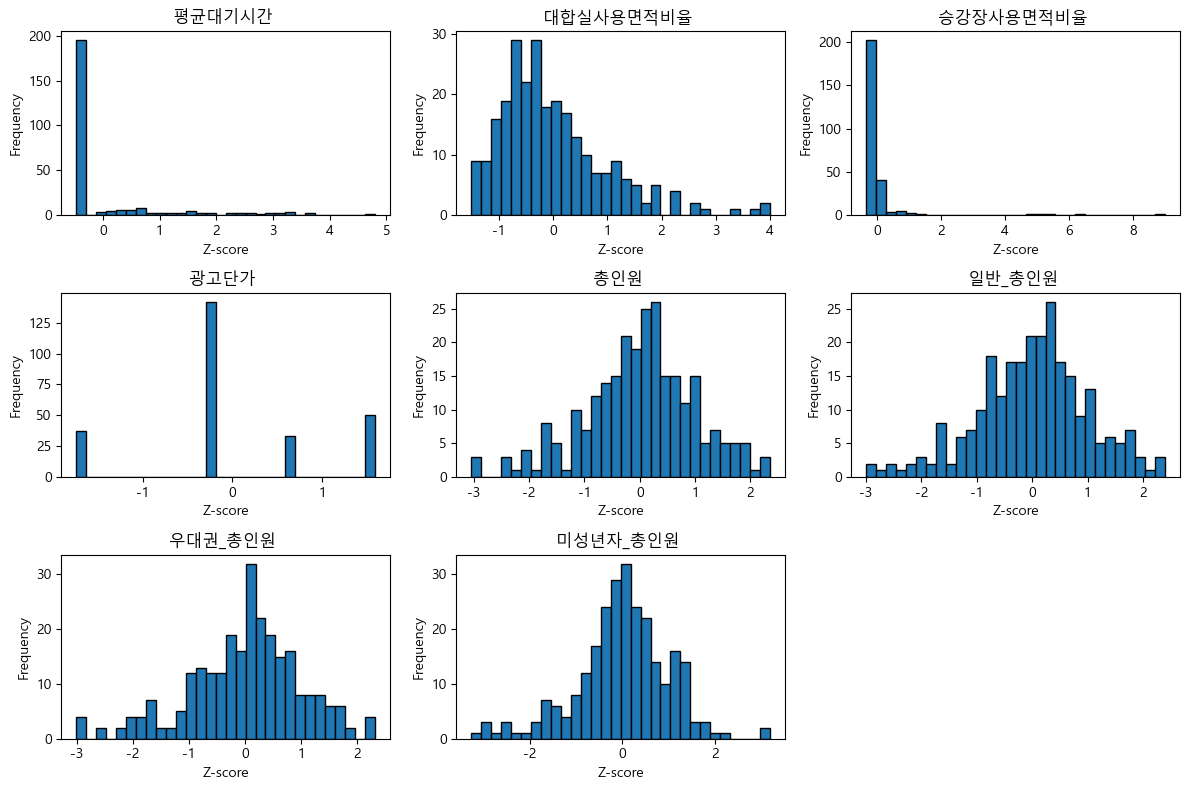


=== ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ Ïù¥ÏÉÅÏπò (9Í∞ú) ===
          Ïó≠Î™Ö  ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ
15     Ïã†Îãπ(2)  3.0786
42     ÎåÄÎ¶º(2)  3.2451
93     ÎÖ∏Ïõê(4)  3.3561
107   ÏÑúÏö∏Ïó≠(4)  3.2451
139  Ï¢ÖÎ°ú3Í∞Ä(5)  3.5782
190    Ïã†Îãπ(6)  3.1341
207    ÎÖ∏Ïõê(7)  3.2451
237    ÎåÄÎ¶º(7)  3.5782
258      Ïó∞Ïã†ÎÇ¥  4.7995

=== ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú® Ïù¥ÏÉÅÏπò (4Í∞ú) ===
       Ïó≠Î™Ö  ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®
28     ÏÇºÏÑ±     3.9751
31     Í∞ïÎÇ®     3.9974
32  ÍµêÎåÄ(2)     3.4198
60     ÏßÄÏ∂ï     3.7774

=== ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú® Ïù¥ÏÉÅÏπò (6Í∞ú) ===
          Ïó≠Î™Ö  ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®
11     ÏùÑÏßÄÎ°úÏûÖÍµ¨     4.7823
12  ÏùÑÏßÄÎ°ú3Í∞Ä(2)     5.5171
23        Í∞ïÎ≥Ä     5.0940
28        ÏÇºÏÑ±     9.0014
29        ÏÑ†Î¶â     6.3477
31        Í∞ïÎÇ®     6.2322

=== Í¥ëÍ≥†Îã®Í∞Ä Ïù¥ÏÉÅÏπò (0Í∞ú) ===
Ïù¥ÏÉÅÏπò ÏóÜÏùå

=== Ï¥ùÏù∏Ïõê Ïù¥ÏÉÅÏπò (2Í∞ú) ===
     Ïó≠Î™Ö     Ï¥ùÏù∏Ïõê
54   Ïã†Îãµ -3.0490
57  ÎèÑÎ¶ºÏ≤ú -3.0284

=== ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê Ïù¥ÏÉÅÏπò (0Í∞ú) ===
Ïù¥ÏÉÅÏπò

In [16]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_new = pd.read_csv('merged_data_2.csv', encoding='euc-kr')

# ÌëúÏ§ÄÌôîÌï† Ïó¥ Î™©Î°ù (Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ Ï†ïÏùò)
columns_to_scale = ['ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ', 'ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'Í¥ëÍ≥†Îã®Í∞Ä']

# ÌëúÏ§ÄÌôî Í≥ÑÏÇ∞ (StandardScaler ÏÇ¨Ïö©)
scaler = StandardScaler()
df_new[columns_to_scale] = scaler.fit_transform(df_new[columns_to_scale])

# ÏÜåÏàòÏ†ê 4ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º
df_new[columns_to_scale] = df_new[columns_to_scale].round(4)

# Î°úÍ∑∏ Î≥ÄÌôòÌï† Ïó¥ Î™©Î°ù (ÏñëÏàò Í∞íÏóêÎßå Ï†ÅÏö©)
columns_to_transform = ['Ï¥ùÏù∏Ïõê', 'ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Ïö∞ÎåÄÍ∂å_Ï¥ùÏù∏Ïõê', 'ÎØ∏ÏÑ±ÎÖÑÏûê_Ï¥ùÏù∏Ïõê']

# Î°úÍ∑∏ Î≥ÄÌôò (0 ÎòêÎäî ÏùåÏàòÎäî Ï†úÏô∏)
df_new[columns_to_transform] = df_new[columns_to_transform].apply(lambda x: np.log1p(x))  # np.log1p(x) = log(x + 1)

# ÌëúÏ§ÄÌôî Í≥ÑÏÇ∞ (StandardScaler ÏÇ¨Ïö©)
df_new[columns_to_transform] = scaler.fit_transform(df_new[columns_to_transform])

# ÏÜåÏàòÏ†ê 4ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º
df_new[columns_to_transform] = df_new[columns_to_transform].round(4)

# ÏãúÍ∞ÅÌôî: ÌëúÏ§ÄÌôîÎêú Í∞íÏùò ÌûàÏä§ÌÜ†Í∑∏Îû® (Í∞ÅÍ∞ÅÏùò Ïª¨ÎüºÏóê ÎåÄÌï¥ Z-scoreÏùò Î∂ÑÌè¨)
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_scale + columns_to_transform, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_new[column], bins=30, edgecolor='black')
    plt.title(f'{column} ')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ: Z-score Í∏∞Ï§Ä ¬±3
for col in columns_to_scale + columns_to_transform:
    z_scores = stats.zscore(df_new[col])  # Z-Score Í≥ÑÏÇ∞
    outliers = df_new[(z_scores > 3) | (z_scores < -3)]  # Z-scoreÍ∞Ä 3Î≥¥Îã§ ÌÅ∞ Í∞íÏùÄ Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£º
    print(f"\n=== {col} Ïù¥ÏÉÅÏπò ({len(outliers)}Í∞ú) ===")
    if not outliers.empty:
        print(outliers[['Ïó≠Î™Ö', col]])
    else:
        print("Ïù¥ÏÉÅÏπò ÏóÜÏùå")

# ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò ÌååÏùºÎ°ú Ï†ÄÏû•
df_new.to_csv('final.csv', index=False, encoding='euc-kr')

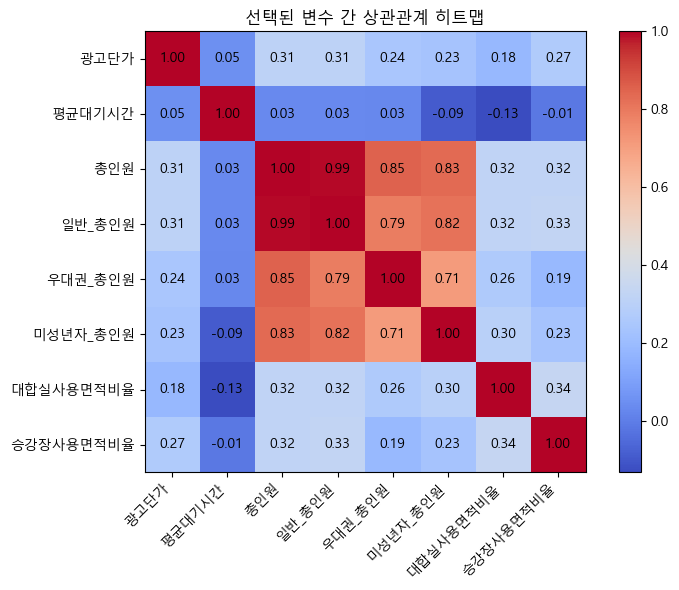

In [17]:
# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('final.csv', encoding='euc-kr')

# ÏÇ¨Ïö©Ìï† Ïó¥Îßå ÏÑ†ÌÉù
selected_cols = ['Í¥ëÍ≥†Îã®Í∞Ä', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ','Ï¥ùÏù∏Ïõê', 'ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Ïö∞ÎåÄÍ∂å_Ï¥ùÏù∏Ïõê', 'ÎØ∏ÏÑ±ÎÖÑÏûê_Ï¥ùÏù∏Ïõê', 'ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', ]
df_selected = df[selected_cols]

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr = df_selected.corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
im = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)

# Ï∂ï Ïù¥Î¶Ñ ÏÑ§Ï†ï
labels = corr.columns
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.yticks(range(len(labels)), labels)

# Í∞Å ÏÖÄÏóê ÏÉÅÍ¥ÄÍ≥ÑÏàò Ïà´Ïûê ÎÑ£Í∏∞
for i in range(len(corr)):
    for j in range(len(corr)):
        value = corr.iloc[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')

plt.title('ÏÑ†ÌÉùÎêú Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ')
plt.tight_layout()
plt.show()





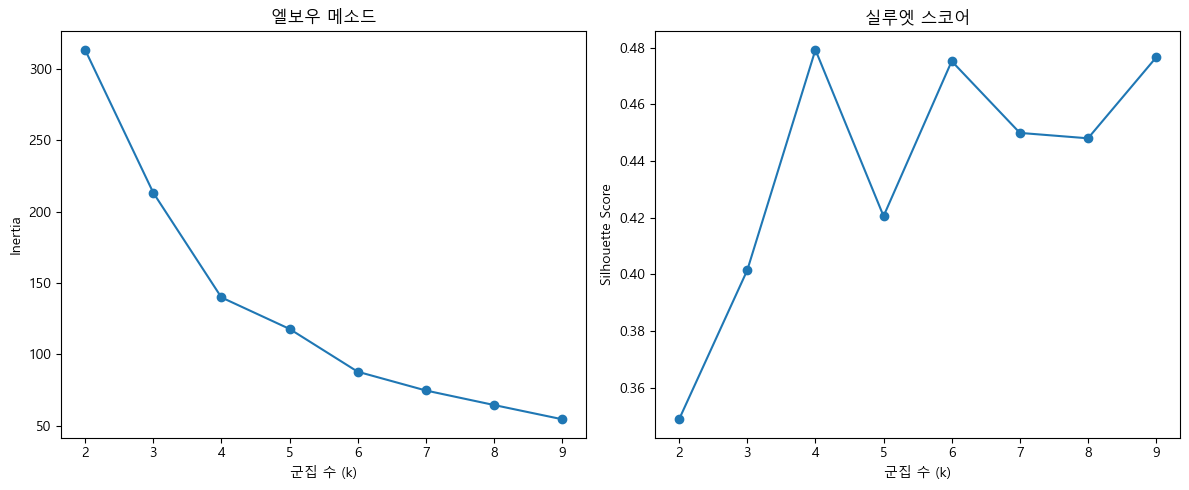

In [18]:
df = pd.read_csv('final.csv', encoding='euc-kr')

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
selected_cols = ['ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Í¥ëÍ≥†Îã®Í∞Ä']
X_scaled = df[selected_cols].dropna()  # Ïù¥ÎØ∏ ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Í∞ÄÏ†ï

# ÏóòÎ≥¥Ïö∞ & Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
inertias = []
silhouettes = []
ks = range(2, 10)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# ‚ñ∂ ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.title('ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú')
plt.xlabel('Íµ∞Ïßë Ïàò (k)')
plt.ylabel('Inertia')

# ‚ñ∂ Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥
plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes, marker='o')
plt.title('Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥')
plt.xlabel('Íµ∞Ïßë Ïàò (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



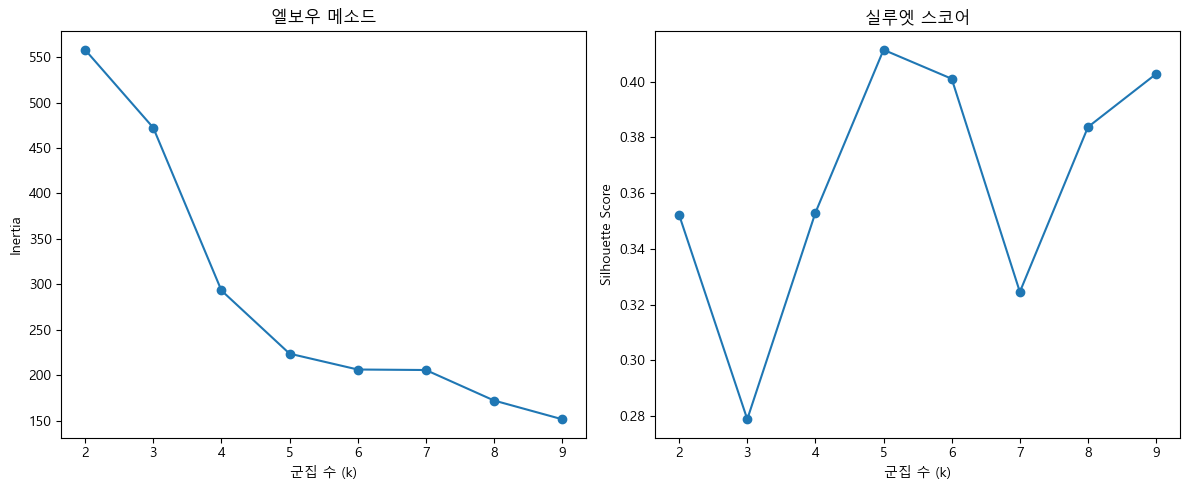

In [19]:
df = pd.read_csv('final.csv', encoding='euc-kr')

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
selected_cols = ['ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Í¥ëÍ≥†Îã®Í∞Ä', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ']
X_scaled = df[selected_cols].dropna()  # Ïù¥ÎØ∏ ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Í∞ÄÏ†ï

# ÏóòÎ≥¥Ïö∞ & Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
inertias = []
silhouettes = []
ks = range(2, 10)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# ‚ñ∂ ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.title('ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú')
plt.xlabel('Íµ∞Ïßë Ïàò (k)')
plt.ylabel('Inertia')

# ‚ñ∂ Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥
plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes, marker='o')
plt.title('Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥')
plt.xlabel('Íµ∞Ïßë Ïàò (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

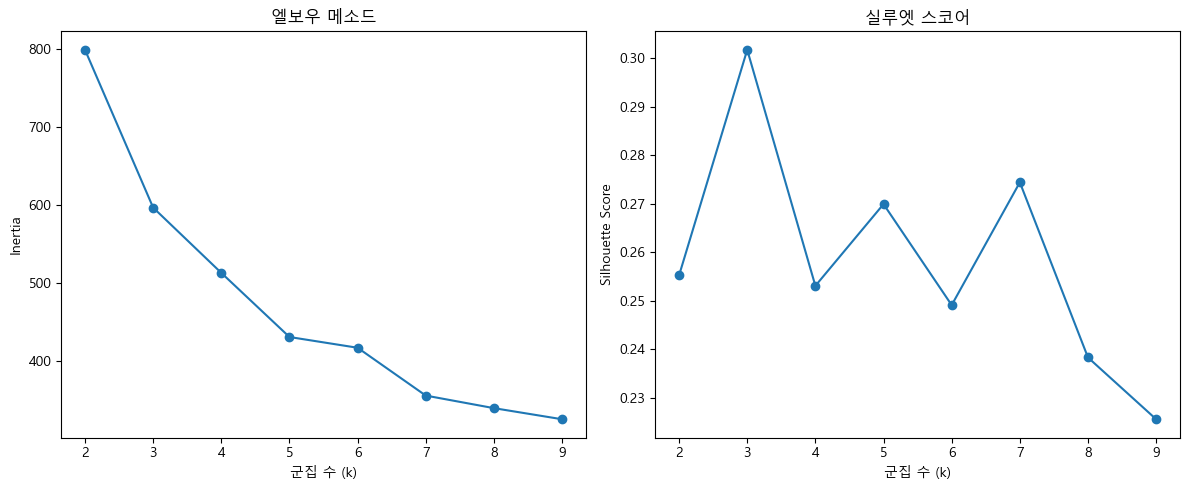

In [20]:
df = pd.read_csv('final.csv', encoding='euc-kr')

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
selected_cols = ['ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Í¥ëÍ≥†Îã®Í∞Ä', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ', 'ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®']
X_scaled = df[selected_cols].dropna()  # Ïù¥ÎØ∏ ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Í∞ÄÏ†ï

# ÏóòÎ≥¥Ïö∞ & Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
inertias = []
silhouettes = []
ks = range(2, 10)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# ‚ñ∂ ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.title('ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú')
plt.xlabel('Íµ∞Ïßë Ïàò (k)')
plt.ylabel('Inertia')

# ‚ñ∂ Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥
plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes, marker='o')
plt.title('Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥')
plt.xlabel('Íµ∞Ïßë Ïàò (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [21]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('final.csv', encoding='euc-kr')

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
selected_cols = ['ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Í¥ëÍ≥†Îã®Í∞Ä']
X_scaled = df[selected_cols].dropna()

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Í≤∞Í≥º Î∞òÏòÅ
df_result = df.loc[X_scaled.index].copy()
df_result['ÌÅ¥Îü¨Ïä§ÌÑ∞'] = labels

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ï∂úÎ†•
cluster_summary = df_result.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞')[selected_cols].mean().round(2)
print(cluster_summary)

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞ 
df_result = df_result.drop(
    [ 'Ï¥ùÏù∏Ïõê', 'Ïö∞ÎåÄÍ∂å_Ï¥ùÏù∏Ïõê', 'ÎØ∏ÏÑ±ÎÖÑÏûê_Ï¥ùÏù∏Ïõê', 'ÏäπÍ∞ïÏû•ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'Ïô∏Íµ≠Ïù∏ÎπÑÏú®', 'Ïû•Ïï†Ïù∏ÎπÑÏú®'],
    axis=1,
    errors='ignore'
)

# Ï†ÄÏû•
df_result.to_csv('final_with_cluster.csv', index=False, encoding='euc-kr')


      ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê  Í¥ëÍ≥†Îã®Í∞Ä
ÌÅ¥Îü¨Ïä§ÌÑ∞              
0       0.35 -0.17
1      -1.17  0.12
2       0.99  1.43
3      -0.54 -1.74


In [22]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
sil_score = silhouette_score(X_scaled, labels)
calinski = calinski_harabasz_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)

print(f" Silhouette Score: {sil_score:.4f}  (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÏùå)")
print(f" Calinski-Harabasz Index: {calinski:.2f}  (ÌÅ¥ÏàòÎ°ù Ï¢ãÏùå)")
print(f" Davies-Bouldin Index: {davies:.4f}  (ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå)")


 Silhouette Score: 0.4792  (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÏùå)
 Calinski-Harabasz Index: 236.09  (ÌÅ¥ÏàòÎ°ù Ï¢ãÏùå)
 Davies-Bouldin Index: 0.7492  (ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå)


üìä ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†:
      ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê  Í¥ëÍ≥†Îã®Í∞Ä
ÌÅ¥Îü¨Ïä§ÌÑ∞              
0       0.35 -0.17
1      -1.17  0.12
2       0.99  1.43
3      -0.54 -1.74



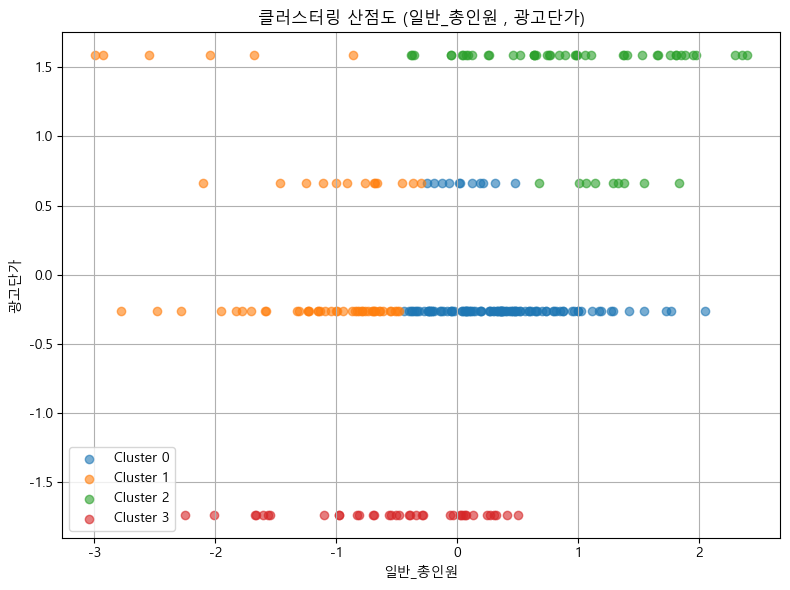

In [23]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('final.csv', encoding='euc-kr')

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
features = ['ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê', 'Í¥ëÍ≥†Îã®Í∞Ä']
X = df[features].dropna()

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (4Í∞ú Íµ∞Ïßë)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ÄÏû•
df = df.loc[X.index].copy()
df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] = labels

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í ÏöîÏïΩ
cluster_summary = df.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞')[features].mean().round(2)
print("üìä ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†:")
print(cluster_summary)
print()

# ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
for cluster_id in sorted(df['ÌÅ¥Îü¨Ïä§ÌÑ∞'].unique()):
    cluster_data = df[df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster_id]
    plt.scatter(
        cluster_data['ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê'],
        cluster_data['Í¥ëÍ≥†Îã®Í∞Ä'],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

plt.xlabel('ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê')
plt.ylabel('Í¥ëÍ≥†Îã®Í∞Ä')
plt.title('ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏÇ∞Ï†êÎèÑ (ÏùºÎ∞ò_Ï¥ùÏù∏Ïõê , Í¥ëÍ≥†Îã®Í∞Ä)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


| ÌÅ¥Îü¨Ïä§ÌÑ∞ | ÏùºÎ∞ò\_Ï¥ùÏù∏Ïõê ÌèâÍ∑† | Í¥ëÍ≥†Îã®Í∞Ä ÌèâÍ∑†  | Ìï¥ÏÑù ÏöîÏïΩ                                |
| ---- | ------- | ----- | ------------------------------------ |
| 0    | 0.35    | -0.17 | **Ïú†ÎèôÏù∏Íµ¨Îäî Îã§ÏÜå ÎßéÍ≥†, Í¥ëÍ≥†Îã®Í∞ÄÎäî ÎÇÆÏùå ‚Üí Í∞ÄÏÑ±ÎπÑ Ï¢ãÏùÄ Ïó≠** |
| 1    | -1.17   | 0.12  | **Ïú†ÎèôÏù∏Íµ¨Îäî Ï†ÅÍ≥†, Í¥ëÍ≥†Îã®Í∞ÄÎäî ÎÜíÏùå ‚Üí Í¥ëÍ≥†Ï£º ÏûÖÏû•ÏóêÏÑú ÎπÑÌö®Ïú®Ï†Å, ÎπÑÏ∂îÏ≤ú**   |
| 2    | 0.99    | 1.43  | **Ïú†ÎèôÏù∏Íµ¨ÏôÄ Í¥ëÍ≥†Îã®Í∞Ä Î™®Îëê Îß§Ïö∞ ÎÜíÏùå ‚Üí ÌïµÏã¨ ÌîÑÎ¶¨ÎØ∏ÏóÑ Ïó≠**  |
| 3    | -0.54   | -1.74 | **Ïú†ÎèôÏù∏Íµ¨ÏôÄ Í¥ëÍ≥†Îã®Í∞Ä Î™®Îëê ÎÇÆÏùå ‚Üí Ï†ÄÍ∞Ä Í¥ëÍ≥† Ï†ÑÎûµ Í∞ÄÎä•**   |



====== ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ======


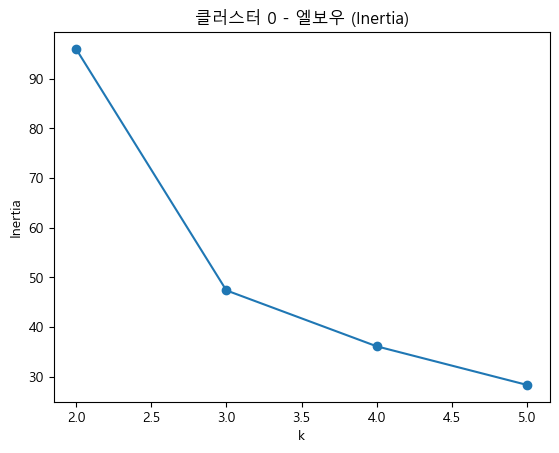

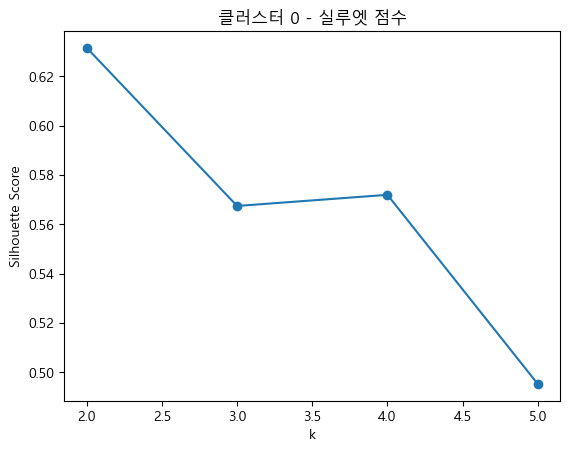

‚ñ∂ ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†:
        ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®  ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ
ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞                   
0          -0.363  -0.384
1          -0.238   2.454
2           1.190  -0.327

====== ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ======


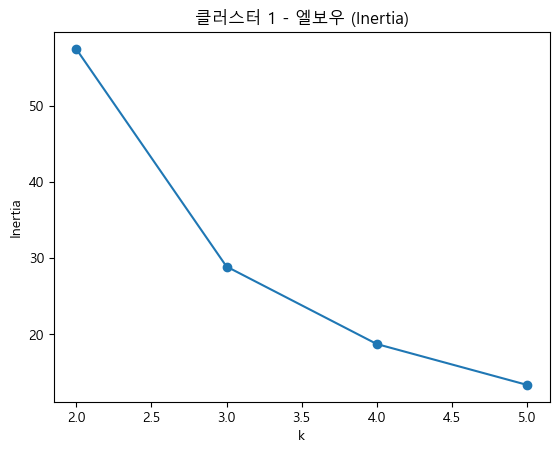

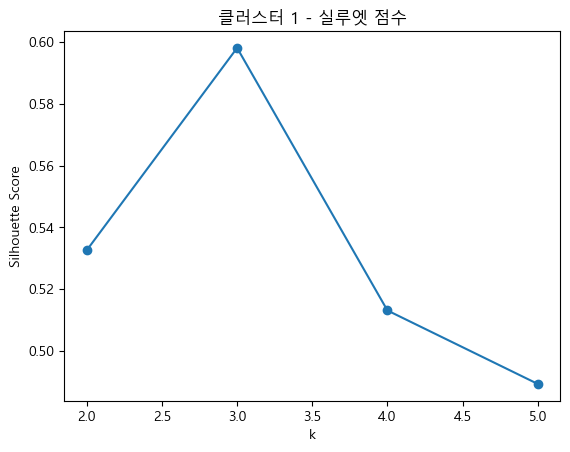

‚ñ∂ ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†:
        ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®  ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ
ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞                   
0          -0.788  -0.360
1           1.387  -0.424
2          -0.222   1.959

====== ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ======


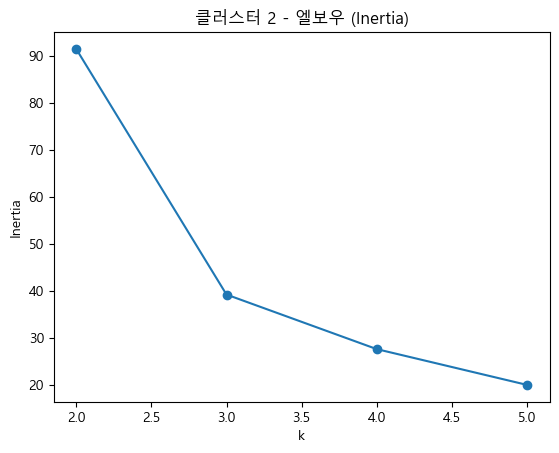

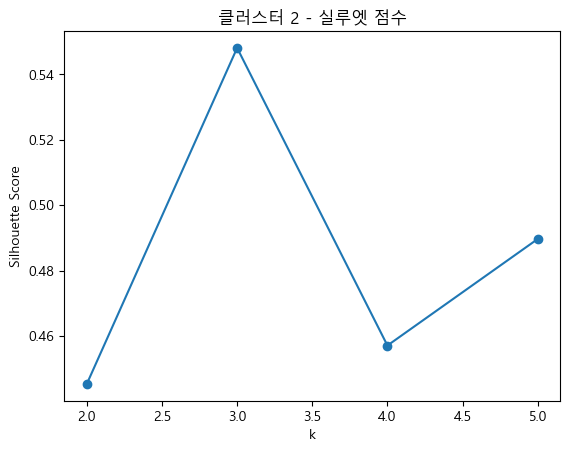

‚ñ∂ ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†:
        ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®  ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ
ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞                   
0           2.330  -0.308
1          -0.144  -0.243
2          -0.422   2.769

====== ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ======


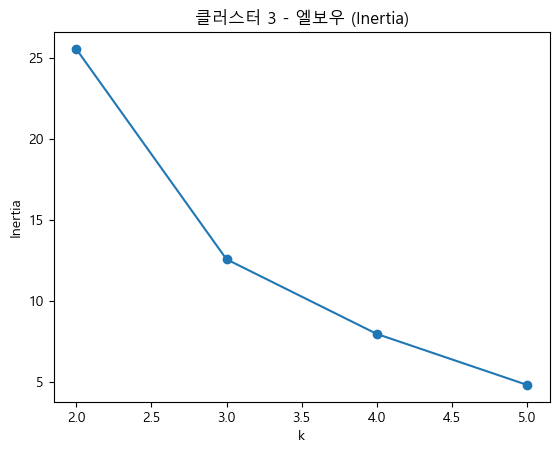

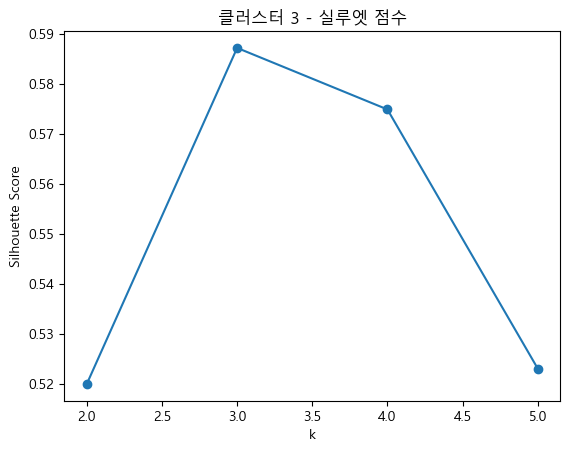

‚ñ∂ ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†:
        ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®  ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ
ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞                   
0          -0.360  -0.410
1          -0.433   1.350
2           1.579  -0.474


In [24]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_all = pd.read_csv('final_with_cluster.csv', encoding='euc-kr')

# ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìï† ÏπºÎüºÎßå Î≥µÏÇ¨ (Ïù∏Îç±Ïä§ Ïú†ÏßÄ)
df = df_all[['Ïó≠Î™Ö', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ']].copy()
df = df.dropna()
df['ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞'] = -1  # Ï¥àÍ∏∞Ìôî

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
for cluster in sorted(df['ÌÅ¥Îü¨Ïä§ÌÑ∞'].unique()):
    print(f"\n====== ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster} ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ======")
    cluster_df = df[df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster].copy()
    X = cluster_df[['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ']]

    inertia_list = []
    silhouette_list = []
    k_range = range(2, 6)

    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(X)
        inertia_list.append(model.inertia_)
        silhouette_list.append(silhouette_score(X, labels))

    plt.figure()
    plt.plot(k_range, inertia_list, marker='o')
    plt.title(f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster} - ÏóòÎ≥¥Ïö∞ (Inertia)')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()

    plt.figure()
    plt.plot(k_range, silhouette_list, marker='o')
    plt.title(f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster} - Ïã§Î£®Ïó£ Ï†êÏàò')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.show()

    final_model = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_final = final_model.fit_predict(X)
    df.loc[cluster_df.index, 'ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞'] = labels_final

    print(f"‚ñ∂ ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster} ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†:")
    summary = df[df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster].groupby('ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞')[['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ']].mean()
    print(summary.round(3))

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥ëÌï© (Ïó≠Î™Ö + ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∏∞Ï§Ä)
df_all['ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞'] = df['ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞']  # Ïù∏Îç±Ïä§ Í∏∞Ï§ÄÏúºÎ°ú ÏûêÎèô Ï†ïÎ†¨Îê®

# Ï†ÄÏû•
df_all.to_csv('final_with_subclusters.csv', index=False, encoding='euc-kr')




### ÌÅ¥Îü¨Ïä§ÌÑ∞ 0

| ÌÅ¥Îü¨Ïä§ÌÑ∞0 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ | ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú® | ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ |
|--------------|------------------|--------------|
| 0            | -0.363           | -0.384       |
| 1            | -0.238           |  2.454       |
| 2            |  1.190           | -0.327       |

‚Üí ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ 1: ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ Í∏∏Í≥† Í≥µÍ∞Ñ Ìö®Ïú®Ïù¥ Î≥¥ÌÜµÏûÑ

---

### ÌÅ¥Îü¨Ïä§ÌÑ∞ 1

| ÌÅ¥Îü¨Ïä§ÌÑ∞1 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ | ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú® | ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ |
|--------------|------------------|--------------|
| 0            | -0.788           | -0.360       |
| 1            |  1.387           | -0.424       |
| 2            | -0.222           |  1.959       |

‚Üí ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ 2: ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ Í∏∏Í≥† Í≥µÍ∞Ñ Ìö®Ïú®Ïù¥ ÏñëÌò∏Ìï®

---

### ÌÅ¥Îü¨Ïä§ÌÑ∞ 2

| ÌÅ¨Îü¨Ïä§ÌÑ∞2 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ | ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú® | ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ |
|--------------|------------------|--------------|
| 0            |  2.330           | -0.308       |
| 1            | -0.144           | -0.243       |
| 2            | -0.422           |  2.769       |

‚Üí ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ 2: ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ Í∞ÄÏû• Í∏∏Í≥† Í≥µÍ∞Ñ Ìö®Ïú®ÎèÑ Í∞ÄÏû• ÎÜíÏùå

---

### ÌÅ¥Îü¨Ïä§ÌÑ∞ 3

| ÌÅ¥Îü¨Ïä§ÌÑ∞3 ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ | ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú® | ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ |
|--------------|------------------|--------------|
| 0            | -0.360           | -0.410       |
| 1            | -0.433           |  1.350       |
| 2            |  1.579           | -0.474       |

‚Üí ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ 1: ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ Í∏∏Í≥† Í≥µÍ∞Ñ Ìö®Ïú®Ïù¥ ÎÜíÏùå



In [25]:
# Í¥ëÍ≥† Ìö®Ïú®Ïù¥ ÎÜíÏùÄ ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ Ï°∞Í±¥ Ï†ïÏùò
target_subclusters = [
    (0, 1),
    (1, 2),
    (2, 2),
    (3, 1),
]

# Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ÏóêÏÑú 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ ‚Üë & Ìè¨ÌôîÎèÑ ‚Üì' Í∏∞Ï§Ä ÏÉÅÏúÑ 15Í∞ú Ïó≠ Ï∂îÏ∂ú
representative_stations = []

for (cluster, sub_cluster) in target_subclusters:
    filtered = df[
        (df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster) & 
        (df['ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞'] == sub_cluster)
    ]
    
    # Îëê Ï°∞Í±¥ÏùÑ ÎèôÏãúÏóê Í≥†Î†§Ìïú Ï†ïÎ†¨
    top_stations = filtered.sort_values(
        ['ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ', 'ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®'], 
        ascending=[False, True]
    ).head(15)
    
    for _, row in top_stations.iterrows():
        representative_stations.append({
            'ÌÅ¥Îü¨Ïä§ÌÑ∞': cluster,
            'ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞': sub_cluster,
            'Ïó≠Î™Ö': row['Ïó≠Î™Ö'],
            'ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®': row['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®'],
            'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ': row['ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ']
        })

# Í≤∞Í≥º ÌôïÏù∏
rep_df = pd.DataFrame(representative_stations)
print(rep_df)


    ÌÅ¥Îü¨Ïä§ÌÑ∞  ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞            Ïó≠Î™Ö  ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®  ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ
0      0       1       Ï¢ÖÎ°ú3Í∞Ä(5)    -0.3191  3.5782
1      0       1         ÎåÄÎ¶º(7)    -0.2899  3.5782
2      0       1         ÎÖ∏Ïõê(4)     0.0569  3.3561
3      0       1        ÏÑúÏö∏Ïó≠(4)    -0.7659  3.2451
4      0       1         ÎÖ∏Ïõê(7)     0.3330  3.2451
5      0       1        ÎèôÎåÄÎ¨∏(1)     0.8272  2.9120
6      0       1        ÎèôÎåÄÎ¨∏(4)     0.2522  2.8010
7      0       1         Ïû†Ïã§(8)    -0.6517  2.5234
8      0       1        ÏÑúÏö∏Ïó≠(1)    -0.9648  2.4679
9      0       1        Ïã†ÏÑ§Îèô(1)     0.5459  2.3013
10     0       1       Ï¢ÖÎ°ú3Í∞Ä(3)    -1.5030  1.7462
11     0       1      Í≥†ÏÜçÌÑ∞ÎØ∏ÎÑê(7)    -0.3128  1.5796
12     0       1         ÏãúÏ≤≠(1)    -1.1005  1.5241
13     0       1      ÏùÑÏßÄÎ°ú3Í∞Ä(3)    -0.9066  1.5241
14     0       1         ÏïΩÏàò(3)     0.9425  1.4686
15     1       2  ÎèôÎåÄÎ¨∏Ïó≠ÏÇ¨Î¨∏ÌôîÍ≥µÏõê(5)    -0.9221  2

In [26]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('final_with_cluster.csv', encoding='euc-kr')

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉù
cols = ['Ïó≠Î™Ö', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ']
df = df[cols].dropna()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Í∏∞Ï§Ä Ï†ïÌïòÍ∏∞: Î©¥Ï†ÅÎπÑÏú®ÏùÄ ÌïòÏúÑ 25%, ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÄ ÏÉÅÏúÑ 25%
result = []

for cluster in sorted(df['ÌÅ¥Îü¨Ïä§ÌÑ∞'].unique()):
    sub = df[df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster]
    
    area_threshold = sub['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®'].quantile(0.15)
    wait_threshold = sub['ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ'].quantile(0.85)
    
    filtered = sub[(sub['ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®'] <= area_threshold) & 
                   (sub['ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ'] >= wait_threshold)]
    
    result.append(filtered)

# Í≤∞Í≥º Î≥ëÌï©
final_result = pd.concat(result).sort_values(['ÌÅ¥Îü¨Ïä§ÌÑ∞', 'ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ'], ascending=[True, False])

# Í≤∞Í≥º ÌôïÏù∏
print(final_result)


           Ïó≠Î™Ö  ÌÅ¥Îü¨Ïä§ÌÑ∞  ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú®  ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ
107    ÏÑúÏö∏Ïó≠(4)     0    -0.7659  3.2451
0      ÏÑúÏö∏Ïó≠(1)     0    -0.9648  2.4679
69    Ï¢ÖÎ°ú3Í∞Ä(3)     0    -1.5030  1.7462
1       ÏãúÏ≤≠(1)     0    -1.1005  1.5241
70   ÏùÑÏßÄÎ°ú3Í∞Ä(3)     0    -0.9066  1.5241
128  ÏòÅÎì±Ìè¨Íµ¨Ï≤≠(5)     1    -1.3781  0.4138
91      Ïò§Í∏à(3)     1    -1.4939  0.3583
140  ÏùÑÏßÄÎ°ú4Í∞Ä(5)     1    -1.3168  0.2473
258       Ïó∞Ïã†ÎÇ¥     2    -0.7691  4.7995
52     Ï∂©Ï†ïÎ°ú(2)     2    -0.7756  2.4679
78   Í≥†ÏÜçÌÑ∞ÎØ∏ÎÑê(3)     2    -0.7268  2.1903
190     Ïã†Îãπ(6)     3    -0.9681  3.1341
191    ÎèôÎ¨òÏïû(6)     3    -0.8880  1.1910


### ‚úÖ Í≥†Ìö®Ïú® Ï°∞Í±¥ÏùÑ Î™®Îëê ÎßåÏ°±ÌïòÎäî ÌïµÏã¨ Ï§ëÎ≥µ Ïó≠ Î™©Î°ù

| Ïó≠Î™Ö             | ÌÅ¥Îü¨Ïä§ÌÑ∞ | ÏÑúÎ∏åÌÅ¥Îü¨Ïä§ÌÑ∞ | ÎåÄÌï©Ïã§ÏÇ¨Ïö©Î©¥Ï†ÅÎπÑÏú® | ÌèâÍ∑†ÎåÄÍ∏∞ÏãúÍ∞Ñ | ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌäπÏÑ± ÏöîÏïΩ                                |
|------------------|----------|---------------|---------------------|---------------|--------------------------------------------------|
| ÏÑúÏö∏Ïó≠(4)        | 0        | 1             | -0.7659              | 3.2451        | Ïú†Îèô ÎßéÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÇÆÏùå (Í≥†Ìö®Ïú®)                |
| ÏÑúÏö∏Ïó≠(1)        | 0        | 1             | -0.9648              | 2.4679        | Ïú†Îèô ÎßéÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÇÆÏùå (Í≥†Ìö®Ïú®)                |
| Ï¢ÖÎ°ú3Í∞Ä(3)       | 0        | 1             | -1.5030              | 1.7462        | Ïú†Îèô ÎßéÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÇÆÏùå (Í≥†Ìö®Ïú®)                |
| ÏãúÏ≤≠(1)          | 0        | 1             | -1.1005              | 1.5241        | Ïú†Îèô ÎßéÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÇÆÏùå (Í≥†Ìö®Ïú®)                |
| ÏùÑÏßÄÎ°ú3Í∞Ä(3)      | 0        | 1             | -0.9066              | 1.5241        | Ïú†Îèô ÎßéÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÇÆÏùå (Í≥†Ìö®Ïú®)                |
| Ïó∞Ïã†ÎÇ¥           | 2        | 2             | -0.7691              | 4.7995        | Ïú†Îèô ÎßéÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÜíÏùå (Í≥†ÎÖ∏Ï∂ú Í≥†ÎπÑÏö©)         |
| Ï∂©Ï†ïÎ°ú(2)        | 2        | 2             | -0.7756              | 2.4679        | Ïú†Îèô ÎßéÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÜíÏùå (Í≥†ÎÖ∏Ï∂ú Í≥†ÎπÑÏö©)         |
| Í≥†ÏÜçÌÑ∞ÎØ∏ÎÑê(3)     | 2        | 2             | -0.7268              | 2.1903        | Ïú†Îèô ÎßéÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÜíÏùå (Í≥†ÎÖ∏Ï∂ú Í≥†ÎπÑÏö©)         |
| Ïã†Îãπ(6)          | 3        | 1             | -0.9681              | 3.1341        | Ïú†Îèô Ï†ÅÍ≥† Í¥ëÍ≥†Îã®Í∞Ä ÎÇÆÏùå (Ï†ÄÍ∞Ä ÏßëÏ§ëÌÉÄÍ≤ü Í∞ÄÎä•)    |
